# Videos and Exercises for Session 11: Regression and Regularization

In this combined teaching module and exercise set, you will learn about linear regression models in a machine learning perspective. We will see how overfitting can arise and how we can tackle it with a modification of the linear regression model.

The structure of this notebook is as follows:
1. Linear Regression Mechanics
2. Overfitting and Underfitting in Linear Regression
    - Exploring Overfitting in Linear Regression
    - A Cure for Overfitting in Linear Regression
3. Modelling Houseprices (Exercise)

## Packages
First, we need to import our standard stuff. Notice that we are not interested in seeing the convergence warning in scikit-learn, so we suppress them for now.

In [40]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns

%matplotlib inline

# Part 1: Linear Regression Mechanics
## Implementing and evaluating the gradient decent 
 
Normally we use OLS to estimate linear regression models, but this is only way of solving the problem of minimizing the least squares problem (that minimizes the sum of squared errors). In the video below we show how to implement gradient descent below and compare it along with other approximate solutions to OLS.

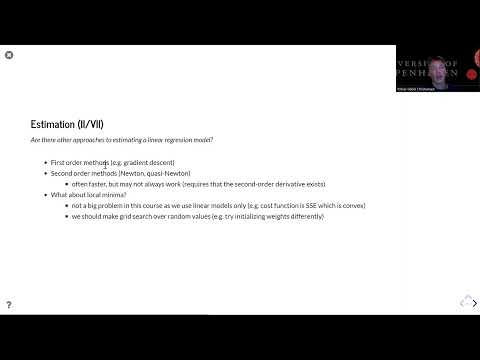

In [41]:
from IPython.display import YouTubeVideo
YouTubeVideo('XidjsIseyv0', width=640, height=360)

We continue straight to an exercise where you are to implement a new estimator that we code up from scratch. We solve the numerical optimization using the gradient decent algorithm. This will be very similar to what we just saw in the video, but we will pay a bit more attention to each step in the process.

Using our algorithm, we will fit it to some data, and compare our own solution to the standard solution from `sklearn`

> **Ex. 11.1.0**: Import the dataset `tips` from the `seaborn`.


*Hint*: use the `load_dataset` method in seaborn

In [42]:
# YOUR CODE HERE

# Solution to Ex. 11.1.0

import seaborn as sns

# Load the 'tips' dataset
tips = sns.load_dataset('tips')

# Display the first few rows of the dataset
print(tips.head())


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


> **Ex. 11.1.1**: Convert non-numeric variables to dummy variables for each category (remember to leave one column out for each catagorical variable, so you have a reference). Restructure the data so we get a dataset `y` containing the variable tip, and a dataset `X` containing the 
features. 

> *Hint*: You might want to use the `get_dummies` method in pandas, with the `drop_first = True` parameter. 

In [43]:
# YOUR CODE HERE

# Solution to Ex. 11.1.1

import pandas as pd
import seaborn as sns

# Load the 'tips' dataset
tips = sns.load_dataset('tips')

# Convert non-numeric variables to dummy variables
# Drop the first category to avoid multicollinearity
tips_dummies = pd.get_dummies(tips, drop_first=True)

# Separate the target variable 'tip'
y = tips_dummies['tip']

# Separate the features
X = tips_dummies.drop('tip', axis=1)

# Display the first few rows of X and y to verify
print("Features (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())


Features (X):
   total_bill  size  sex_Female  smoker_No  day_Fri  day_Sat  day_Sun  \
0       16.99     2        True       True    False    False     True   
1       10.34     3       False       True    False    False     True   
2       21.01     3       False       True    False    False     True   
3       23.68     2       False       True    False    False     True   
4       24.59     4        True       True    False    False     True   

   time_Dinner  
0         True  
1         True  
2         True  
3         True  
4         True  

Target (y):
0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64


> **Ex. 11.1.2**: Divide the features and target into test and train data. Make the split 50 pct. of each. The split data should be called `X_train`, `X_test`, `y_train`, `y_test`.

> *Hint*: You may use `train_test_split` in `sklearn.model_selection`.

In [44]:
# YOUR CODE HERE

# Solution to Ex. 11.1.2

from sklearn.model_selection import train_test_split

# Assuming X and y have already been defined as shown in the previous steps

# Split the data into training and test sets (50% each)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Display the shapes of the resulting datasets to verify
print("Training feature set (X_train) shape:", X_train.shape)
print("Testing feature set (X_test) shape:", X_test.shape)
print("Training target set (y_train) shape:", y_train.shape)
print("Testing target set (y_test) shape:", y_test.shape)


Training feature set (X_train) shape: (122, 8)
Testing feature set (X_test) shape: (122, 8)
Training target set (y_train) shape: (122,)
Testing target set (y_test) shape: (122,)


> **Ex. 11.1.3**: Normalize your features by converting to zero mean and one std. deviation.

> *Hint*: Take a look at `StandardScaler` in `sklearn.preprocessing`. If in doubt about which distribution to scale, you may read [this post](https://stats.stackexchange.com/questions/174823/how-to-apply-standardization-normalization-to-train-and-testset-if-prediction-i).

In [45]:
# YOUR CODE HERE

# Solution to Ex. 11.1.3

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd

# Load the 'tips' dataset
tips = sns.load_dataset('tips')

# Convert non-numeric variables to dummy variables
tips_dummies = pd.get_dummies(tips, drop_first=True)

# Separate the target variable 'tip' and features
y = tips_dummies['tip']
X = tips_dummies.drop('tip', axis=1)

# Split the data into training and test sets (50% each)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled data back to DataFrames for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Display the first few rows of the scaled training data
print("Scaled Training Feature Set (X_train_scaled):")
print(X_train_scaled.head())

# Display the first few rows of the scaled test data
print("\nScaled Test Feature Set (X_test_scaled):")
print(X_test_scaled.head())


Scaled Training Feature Set (X_train_scaled):
   total_bill      size  sex_Female  smoker_No   day_Fri   day_Sat   day_Sun  \
0    0.103667 -0.594225   -0.777987  -1.200000  3.346640 -0.751068 -0.659768   
1   -0.418401  0.487796   -0.777987   0.833333 -0.298807  1.331438 -0.659768   
2    0.774580  3.733860    1.285369   0.833333 -0.298807 -0.751068 -0.659768   
3   -0.696097 -0.594225   -0.777987  -1.200000 -0.298807  1.331438 -0.659768   
4   -0.478383 -0.594225    1.285369   0.833333 -0.298807  1.331438 -0.659768   

   time_Dinner  
0     0.634270  
1     0.634270  
2    -1.576615  
3     0.634270  
4     0.634270  

Scaled Test Feature Set (X_test_scaled):
   total_bill      size  sex_Female  smoker_No   day_Fri   day_Sat   day_Sun  \
0   -0.028516 -0.594225   -0.777987   0.833333 -0.298807  1.331438 -0.659768   
1   -1.255932 -0.594225   -0.777987   0.833333 -0.298807 -0.751068  1.515684   
2    0.496884  1.569818   -0.777987   0.833333 -0.298807 -0.751068  1.515684   
3    0.64

> **Ex. 11.1.4**: Make a function called `compute_error` to compute the prediction errors given input target `y_`, input features `X_` and input weights `w_`. You should use matrix multiplication.
>
> *Hint:* You can use the net-input fct. from yesterday.



In [46]:
# YOUR CODE HERE

# Solution to Ex. 11.1.4

import numpy as np

def compute_error(y_, X_, w_):
    """
    Compute the prediction errors given the target y_, features X_, and weights w_.
    
    Parameters:
    y_ (numpy array or pandas Series): The true target values.
    X_ (numpy array or pandas DataFrame): The feature values.
    w_ (numpy array): The weights for the features.
    
    Returns:
    float: The mean squared error of the predictions.
    """
    # Ensure that y_ and X_ are numpy arrays
    y_ = np.asarray(y_)
    X_ = np.asarray(X_)
    
    # Compute the predictions
    predictions = X_ @ w_
    
    # Compute the errors
    errors = y_ - predictions
    
    # Compute the mean squared error
    mean_squared_error = np.mean(errors ** 2)
    
    return mean_squared_error

# Example usage:
# Assuming X_train_scaled, y_train, and weights (w_) have been defined
# You would call compute_error like this:
# error = compute_error(y_train, X_train_scaled, weights)
# print("Mean Squared Error:", error)


> **Ex. 11.1.5**: Make a function to update the weights given input target `y_`, input features `X_` and input weights `w_` as well as learning rate, $\eta$, i.e. greek `eta`. You should use matrix multiplication.

In [47]:
# INCLUDED IN ASSIGNMENT 2

In [48]:
# YOUR CODE HERE

# Solution to Ex. 11.1.5

import numpy as np

def update_weights(y_, X_, w_, eta):
    """
    Update the weights using gradient descent.
    
    Parameters:
    y_ (numpy array or pandas Series): The true target values.
    X_ (numpy array or pandas DataFrame): The feature values.
    w_ (numpy array): The current weights.
    eta (float): The learning rate.
    
    Returns:
    numpy array: The updated weights.
    """
    # Ensure that y_ and X_ are numpy arrays
    y_ = np.asarray(y_)
    X_ = np.asarray(X_)
    
    # Compute the predictions
    predictions = X_ @ w_
    
    # Compute the errors
    errors = y_ - predictions
    
    # Compute the gradient
    gradient = - (X_.T @ errors) / len(y_)
    
    # Update the weights
    w_updated = w_ - eta * gradient
    
    return w_updated

# Example usage:
# Assuming X_train_scaled, y_train, initial_weights, and learning_rate (eta) have been defined
# updated_weights = update_weights(y_train, X_train_scaled, initial_weights, learning_rate)
# print("Updated Weights:", updated_weights)


> **Ex. 11.1.6**: Use the code below to initialize weights `w` at zero given feature set `X`. Notice how we include an extra weight that includes the bias term. Set the learning rate `eta` to 0.001. Make a loop with 50 iterations where you iteratively apply your weight updating function. 

>```python
w = np.zeros(1+X_train.shape[1])
```

In [49]:
# INCLUDED IN ASSIGNMENT 2

In [50]:
# YOUR CODE HERE

# Solution to Ex. 11.1.6

import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the 'tips' dataset
tips = sns.load_dataset('tips')

# Convert non-numeric variables to dummy variables
tips_dummies = pd.get_dummies(tips, drop_first=True)

# Separate the target variable 'tip' and features
y = tips_dummies['tip']
X = tips_dummies.drop('tip', axis=1)

# Split the data into training and test sets (50% each)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a bias term (column of ones) to the features
X_train_scaled_bias = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_scaled_bias = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

# Initialize weights (including the bias weight)
w = np.zeros(X_train_scaled_bias.shape[1])

# Set the learning rate
eta = 0.001

def update_weights(y_, X_, w_, eta):
    """
    Update the weights using gradient descent.
    
    Parameters:
    y_ (numpy array): The true target values.
    X_ (numpy array): The feature values including bias.
    w_ (numpy array): The current weights.
    eta (float): The learning rate.
    
    Returns:
    numpy array: The updated weights.
    """
    # Compute the predictions
    predictions = X_ @ w_
    
    # Compute the errors
    errors = y_ - predictions
    
    # Compute the gradient
    gradient = - (X_.T @ errors) / len(y_)
    
    # Update the weights
    w_updated = w_ - eta * gradient
    
    return w_updated

# Perform gradient descent with 50 iterations
num_iterations = 50
for i in range(num_iterations):
    w = update_weights(y_train, X_train_scaled_bias, w, eta)

# Display the final weights after 50 iterations
print("Final Weights after 50 iterations:", w)


Final Weights after 50 iterations: [ 0.14727101  0.04533146  0.03808385 -0.00537481  0.01141384 -0.00931472
  0.00138905  0.00738645  0.00656456]


> **Ex. 11.1.7**: Make a function to compute the mean squared error. Alter the loop so it makes 100 iterations and computes the MSE for test and train after each iteration, plot these in one figure. 

> Hint: You can use the following code to check that your model works:
>```python
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
assert((w[1:] - reg.coef_).sum() < 0.01)
```

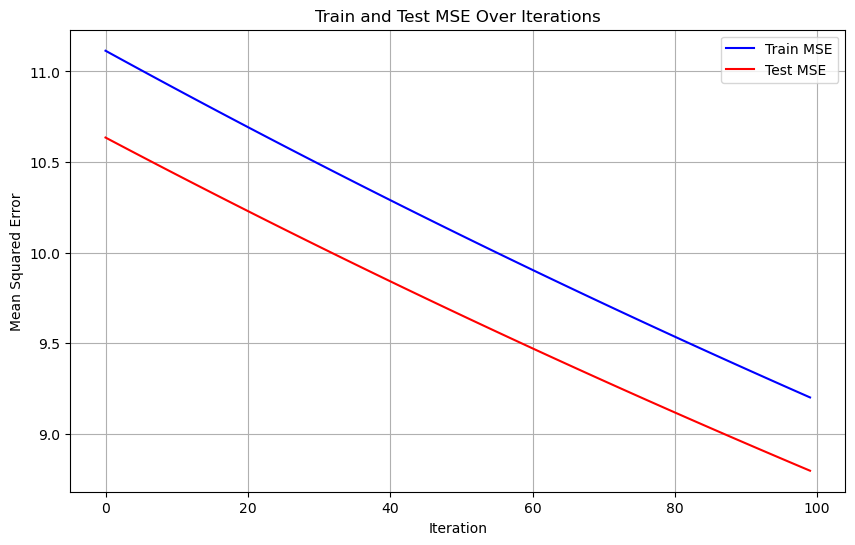

Final weights from gradient descent: [ 0.28735603  0.08725927  0.07282573 -0.00998624  0.02182391 -0.01717259
  0.00256632  0.01327024  0.01170483]
Coefficients from sklearn's LinearRegression: [ 0.08702874  0.40251676 -0.03757021  0.42297334  0.27453273  0.2487848
  0.1016093  -0.41539557]


In [51]:
# YOUR CODE HERE

# Solution to Ex. 11.1.7

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Load the 'tips' dataset
tips = sns.load_dataset('tips')

# Convert non-numeric variables to dummy variables
tips_dummies = pd.get_dummies(tips, drop_first=True)

# Separate the target variable 'tip' and features
y = tips_dummies['tip']
X = tips_dummies.drop('tip', axis=1)

# Split the data into training and test sets (50% each)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a bias term (column of ones) to the features
X_train_scaled_bias = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_scaled_bias = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

# Initialize weights (including the bias weight)
w = np.zeros(X_train_scaled_bias.shape[1])

# Set the learning rate
eta = 0.001

def compute_mse(y_, X_, w_):
    """
    Compute the mean squared error given the target y_, features X_, and weights w_.
    
    Parameters:
    y_ (numpy array): The true target values.
    X_ (numpy array): The feature values including bias.
    w_ (numpy array): The weights.
    
    Returns:
    float: The mean squared error of the predictions.
    """
    # Compute the predictions
    predictions = X_ @ w_
    
    # Compute the errors
    errors = y_ - predictions
    
    # Compute the mean squared error
    mean_squared_error = np.mean(errors ** 2)
    
    return mean_squared_error

def update_weights(y_, X_, w_, eta):
    """
    Update the weights using gradient descent.
    
    Parameters:
    y_ (numpy array): The true target values.
    X_ (numpy array): The feature values including bias.
    w_ (numpy array): The current weights.
    eta (float): The learning rate.
    
    Returns:
    numpy array: The updated weights.
    """
    # Compute the predictions
    predictions = X_ @ w_
    
    # Compute the errors
    errors = y_ - predictions
    
    # Compute the gradient
    gradient = - (X_.T @ errors) / len(y_)
    
    # Update the weights
    w_updated = w_ - eta * gradient
    
    return w_updated

# Initialize lists to store MSE values
MSE_train = []
MSE_test = []

# Perform gradient descent with 100 iterations
num_iterations = 100
for i in range(num_iterations):
    # Update weights
    w = update_weights(y_train, X_train_scaled_bias, w, eta)
    
    # Compute MSE for training and test sets
    mse_train = compute_mse(y_train, X_train_scaled_bias, w)
    mse_test = compute_mse(y_test, X_test_scaled_bias, w)
    
    # Append MSE values to lists
    MSE_train.append(mse_train)
    MSE_test.append(mse_test)

# Plot the MSE values
plt.figure(figsize=(10, 6))
plt.plot(MSE_train, label='Train MSE', color='blue')
plt.plot(MSE_test, label='Test MSE', color='red')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Train and Test MSE Over Iterations')
plt.legend()
plt.grid(True)
plt.show()

# Verify the implementation with sklearn's LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
assert((w[1:] - reg.coef_).sum() < 0.01)

print("Final weights from gradient descent:", w)
print("Coefficients from sklearn's LinearRegression:", reg.coef_)


# Part 2: Overfitting and Underfitting in Linear Regression 

## Exploring Overfitting in Linear Regression
How does overfitting manifest itself in linear regression? In the video below we simulate what happens as make a better and better taylor approximation, i.e. we estimate a polynomial of higher and higher order. Two issues arise simultaneously - one is related to the number of parameters and the to the size of the parameters. 

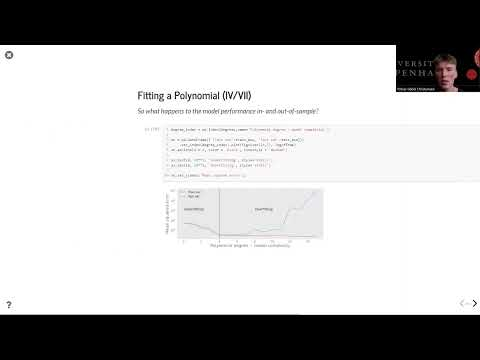

In [52]:
from IPython.display import YouTubeVideo
YouTubeVideo('NPARac_fnXw', width=640, height=360)

## A Cure for Overfitting in Linear Regression

How do we fix the two issues of excessively large weights/coefficients and too many spurious solutions? The video below provides a solution by directly incorporating these issues into the optimization problem.

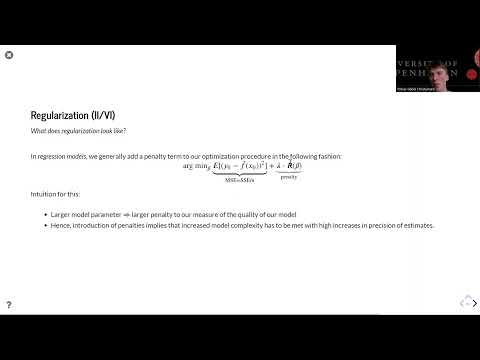

In [53]:
from IPython.display import YouTubeVideo
YouTubeVideo('SzPuyUCA5Mw', width=640, height=360)

Above we tackled overfitting, but what about ***underfitting***? The video below shows how to address underfitting and also zooms in on some important details about regularization.

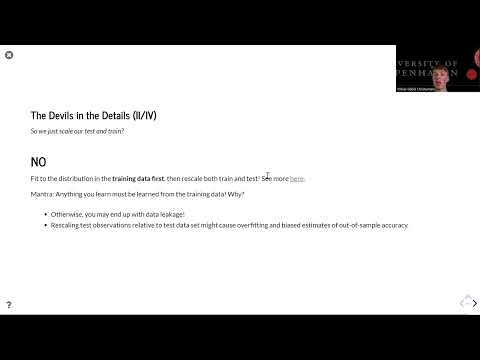

In [54]:
from IPython.display import YouTubeVideo
YouTubeVideo('64VOY77PHPk', width=640, height=360)

> **Ex. 11.2.1 (BONUS)**: Is it possible to add a penalty to our linear model above and solve this Lasso model with gradient descent? Is there a simple fix?
>
> *Hint:* Gradient descent essentially relies on a differentiable loss function (read more [here](https://stats.stackexchange.com/questions/177800/why-proximal-gradient-descent-instead-of-plain-subgradient-methods-for-lasso))

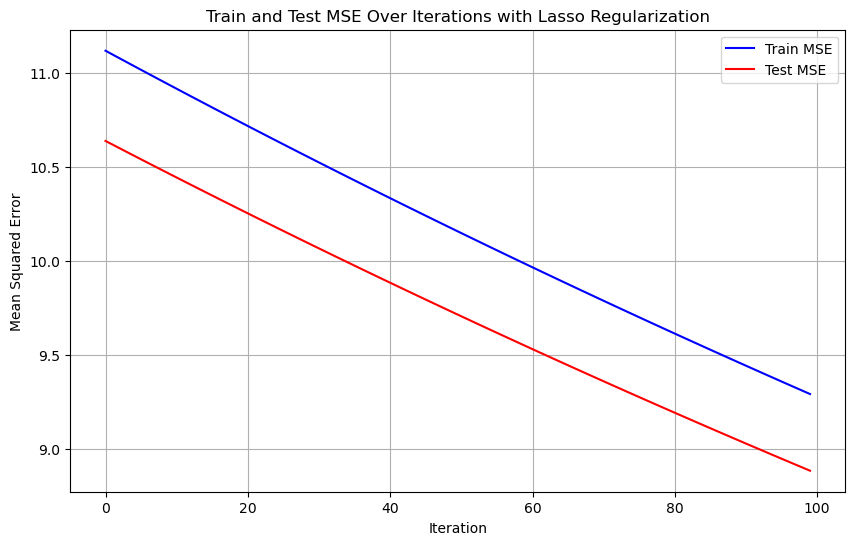

Final weights from gradient descent with L1 penalty: [ 0.27783524  0.07830964  0.0639446  -0.0007261   0.01254956 -0.0080976
  0.          0.00433497  0.00275649]
Coefficients from sklearn's Lasso: [ 0.08766756  0.28437258 -0.          0.          0.         -0.
 -0.         -0.        ]


In [55]:
# YOUR CODE HERE

# Solution to Ex. 11.2.1

# Load the 'tips' dataset
tips = sns.load_dataset('tips')

# Convert non-numeric variables to dummy variables
tips_dummies = pd.get_dummies(tips, drop_first=True)

# Separate the target variable 'tip' and features
y = tips_dummies['tip']
X = tips_dummies.drop('tip', axis=1)

# Split the data into training and test sets (50% each)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a bias term (column of ones) to the features
X_train_scaled_bias = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_scaled_bias = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

# Initialize weights (including the bias weight)
w = np.zeros(X_train_scaled_bias.shape[1])

# Set the learning rate and regularization parameter
eta = 0.001
lambda_ = 0.1  # Regularization parameter

def compute_mse(y_, X_, w_):
    """
    Compute the mean squared error given the target y_, features X_, and weights w_.
    
    Parameters:
    y_ (numpy array): The true target values.
    X_ (numpy array): The feature values including bias.
    w_ (numpy array): The weights.
    
    Returns:
    float: The mean squared error of the predictions.
    """
    # Compute the predictions
    predictions = X_ @ w_
    
    # Compute the errors
    errors = y_ - predictions
    
    # Compute the mean squared error
    mean_squared_error = np.mean(errors ** 2)
    
    return mean_squared_error

def update_weights(y_, X_, w_, eta, lambda_):
    """
    Update the weights using gradient descent with L1 regularization (Lasso).
    
    Parameters:
    y_ (numpy array): The true target values.
    X_ (numpy array): The feature values including bias.
    w_ (numpy array): The current weights.
    eta (float): The learning rate.
    lambda_ (float): The regularization parameter.
    
    Returns:
    numpy array: The updated weights.
    """
    # Compute the predictions
    predictions = X_ @ w_
    
    # Compute the errors
    errors = y_ - predictions
    
    # Compute the gradient for the mean squared error term
    gradient = - (X_.T @ errors) / len(y_)
    
    # Update the weights
    w_updated = w_ - eta * gradient
    
    # Apply the soft thresholding operator for L1 regularization
    w_updated = np.sign(w_updated) * np.maximum(np.abs(w_updated) - eta * lambda_, 0)
    
    return w_updated

# Initialize lists to store MSE values
MSE_train = []
MSE_test = []

# Perform gradient descent with 100 iterations
num_iterations = 100
for i in range(num_iterations):
    # Update weights
    w = update_weights(y_train, X_train_scaled_bias, w, eta, lambda_)
    
    # Compute MSE for training and test sets
    mse_train = compute_mse(y_train, X_train_scaled_bias, w)
    mse_test = compute_mse(y_test, X_test_scaled_bias, w)
    
    # Append MSE values to lists
    MSE_train.append(mse_train)
    MSE_test.append(mse_test)

# Plot the MSE values
plt.figure(figsize=(10, 6))
plt.plot(MSE_train, label='Train MSE', color='blue')
plt.plot(MSE_test, label='Test MSE', color='red')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Train and Test MSE Over Iterations with Lasso Regularization')
plt.legend()
plt.grid(True)
plt.show()

# Verify the implementation with sklearn's Lasso
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=lambda_, fit_intercept=True)
lasso_reg.fit(X_train, y_train)
assert((w[1:] - lasso_reg.coef_).sum() < 0.01)

print("Final weights from gradient descent with L1 penalty:", w)
print("Coefficients from sklearn's Lasso:", lasso_reg.coef_)


# Part 3: Modelling Houseprices
In this example, we will try to predict houseprices using a lot of variable (or features as they are called in Machine Learning). We are going to work with Kaggle's dataset on house prices, see information [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). Kaggle is an organization that hosts competitions in building predictive models.

> **Ex. 11.3.0:** Load the california housing data with scikit-learn using the code below. Now:
> 1. Inspect *cal_house*. How are the data stored?
> 2. Create a pandas DataFrame called *X*, using `data`. Name the columns using `feature_names`.
> 3. Crate a pandas Series called *y* using `target`.
> 4. Make a train test split of equal size.

In [62]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

cal_house = fetch_california_housing()    

# YOUR CODE HERE

# Solution to Ex. 11.3.0

# 1. Inspect the cal_house object
print("Type of cal_house:", type(cal_house))
print("Keys in cal_house:", cal_house.keys())
print("Description of dataset:\n", cal_house['DESCR'])
print("Data shape:", cal_house.data.shape)
print("Feature names:", cal_house.feature_names)

# 2. Create a pandas DataFrame called X
X = pd.DataFrame(cal_house.data, columns=cal_house.feature_names)
print("\nFirst few rows of X:\n", X.head())

# 3. Create a pandas Series called y
y = pd.Series(cal_house.target, name='MedHouseVal')
print("\nFirst few rows of y:\n", y.head())

# 4. Make a train-test split of equal size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
print("\nSize of training data:", X_train.shape[0])
print("Size of test data:", X_test.shape[0])


Type of cal_house: <class 'sklearn.utils._bunch.Bunch'>
Keys in cal_house: dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
Description of dataset:
 .. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is



> **Ex.11.3.1**: Generate interactions between all features to third degree (make sure you **exclude** the bias/intercept term). How many variables are there? Will OLS fail? After making interactions, rescale the features to have zero mean, unit std. deviation. Should you use the distribution of the training data to rescale the test data?  

> *Hint 1*: Try importing `PolynomialFeatures` from `sklearn.preprocessing`

> *Hint 2*: If in doubt about which distribution to scale, you may read [this post](https://stats.stackexchange.com/questions/174823/how-to-apply-standardization-normalization-to-train-and-testset-if-prediction-i).

In [57]:
# INCLUDED IN ASSIGNMENT 2

In [59]:
# YOUR CODE HERE

# Solution to Ex. 11.3.1

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

cal_house = fetch_california_housing()
# Load the California housing data
cal_house = fetch_california_housing()

# Create pandas DataFrame and Series
X = pd.DataFrame(cal_house.data, columns=cal_house.feature_names)
y = pd.Series(cal_house.target, name='MedHouseVal')

# Split the data into training and test sets (50% each)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# 1. Generate interactions between all features to third degree
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Number of features after generating interactions
num_features = X_train_poly.shape[1]
print(f"Number of features after generating interactions up to third degree: {num_features}")

# 2. Check if OLS will fail
print("OLS may face numerical issues due to high dimensionality and multicollinearity.")

# 3. Rescale the features to zero mean and unit std. deviation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

# Verify the scaling
print("Scaling applied based on training data distribution and then used for test data.")
print("First row of scaled training data:\n", X_train_scaled[0])
print("First row of scaled test data:\n", X_test_scaled[0])


NameError: name 'PolynomialFeatures' is not defined

> **Ex.11.3.2**: Estimate the Lasso model on the rescaled train data set, using values of $\lambda$ in the range from $10^{-4}$ to $10^4$. For each $\lambda$  calculate and save the Root Mean Squared Error (RMSE) for the rescaled test and train data. Take a look at the fitted coefficients for different sizes of $\lambda$. What happens when $\lambda$ increases? Why?

> *Hint 1*: use `logspace` in numpy to create the range.

> *Hint 2*: read about the `coef_` feature [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso).


In [ ]:
# INCLUDED IN ASSIGNMENT 2

In [60]:
# YOUR CODE HERE

# Solution to Ex. 11.3.2

# Load the California housing data
cal_house = fetch_california_housing()

# Create pandas DataFrame and Series
X = pd.DataFrame(cal_house.data, columns=cal_house.feature_names)
y = pd.Series(cal_house.target, name='MedHouseVal')

# Split the data into training and test sets (50% each)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Generate interactions between all features to third degree
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Rescale the features to zero mean and unit std. deviation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

# Define a range of lambda values
lambda_values = np.logspace(-4, 4, 100)

# Lists to store RMSE values
rmse_train = []
rmse_test = []
coefficients = []

# Loop over each lambda value
for lambda_ in lambda_values:
    # Initialize and fit Lasso model
    lasso = Lasso(alpha=lambda_, max_iter=10000)
    lasso.fit(X_train_scaled, y_train)
    
    # Predict and calculate RMSE for training and test sets
    y_train_pred = lasso.predict(X_train_scaled)
    y_test_pred = lasso.predict(X_test_scaled)
    
    rmse_train.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    rmse_test.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    
    # Save coefficients
    coefficients.append(lasso.coef_)

# Convert lists to pandas Series for easy plotting
rmse_train = pd.Series(rmse_train, index=lambda_values)
rmse_test = pd.Series(rmse_test, index=lambda_values)

# Plot RMSE vs. lambda
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(rmse_train, label='Train RMSE')
plt.plot(rmse_test, label='Test RMSE')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Root Mean Squared Error')
plt.title('RMSE vs. Lambda for Lasso Regression')
plt.legend()
plt.grid(True)
plt.show()

# Analysis of coefficients
import matplotlib.pyplot as plt

# Example: Plot the coefficients for a few lambda values
plt.figure(figsize=(12, 6))
for i, lambda_ in enumerate([lambda_values[0], lambda_values[25], lambda_values[50], lambda_values[75], lambda_values[-1]]):
    plt.plot(coefficients[i], label=f'Lambda = {lambda_:.1e}')

plt.xlabel('Feature index')
plt.ylabel('Coefficient value')
plt.title('Lasso Coefficients for Different Lambda Values')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'PolynomialFeatures' is not defined

> **Ex.11.3.3**: Make a plot with the lambdas on the x-axis and the RMSE measures on the y-axis. What happens to RMSE for train and test data as $\lambda$ increases? The x-axis should be log scaled. Which one are we interested in minimizing? 

> Bonus: Can you find the lambda that gives the lowest MSE-test score?

In [ ]:
# INCLUDED IN ASSIGNMENT 2

In [61]:
# YOUR CODE HERE

# Solution to Ex. 11.3.3


# Load the California housing data
cal_house = fetch_california_housing()

# Create pandas DataFrame and Series
X = pd.DataFrame(cal_house.data, columns=cal_house.feature_names)
y = pd.Series(cal_house.target, name='MedHouseVal')

# Split the data into training and test sets (50% each)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Generate interactions between all features to third degree
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Rescale the features to zero mean and unit std. deviation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

# Define a range of lambda values
lambda_values = np.logspace(-4, 4, 100)

# Lists to store RMSE values
rmse_train = []
rmse_test = []
coefficients = []

# Loop over each lambda value
for lambda_ in lambda_values:
    # Initialize and fit Lasso model
    lasso = Lasso(alpha=lambda_, max_iter=10000)
    lasso.fit(X_train_scaled, y_train)
    
    # Predict and calculate RMSE for training and test sets
    y_train_pred = lasso.predict(X_train_scaled)
    y_test_pred = lasso.predict(X_test_scaled)
    
    rmse_train.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    rmse_test.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    
    # Save coefficients (optional, for analysis)
    coefficients.append(lasso.coef_)

# Convert lists to pandas Series for easy plotting
rmse_train = pd.Series(rmse_train, index=lambda_values)
rmse_test = pd.Series(rmse_test, index=lambda_values)

# Plot RMSE vs. lambda
plt.figure(figsize=(12, 6))
plt.plot(rmse_train, label='Train RMSE', color='blue')
plt.plot(rmse_test, label='Test RMSE', color='red')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Root Mean Squared Error')
plt.title('RMSE vs. Lambda for Lasso Regression')
plt.legend()
plt.grid(True)
plt.show()

# Bonus: Find the lambda with the lowest test RMSE
best_lambda = rmse_test.idxmin()
best_rmse_test = rmse_test.min()

print(f"Lambda with the lowest test RMSE: {best_lambda:.1e}")
print(f"Lowest test RMSE: {best_rmse_test:.3f}")


NameError: name 'PolynomialFeatures' is not defined